# Neural Networks using Pytorch
___
Author: Simon Thornewill von Essen

Date: 02.08.2018
___

Here I will write a neural network using Pytorch. This is part of the exercise done on the Udacity classroom. I am writing this on my computer so that I can get a better understanding of neural networks by creating one myself instead of watching someone else code it for me. 

In [1]:
# Importing libraries
import torch
import helper
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch import nn
from torch import optim


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Part 1 - Importing Data

Importing the data requires a little more work than just throwing it into memory. Data needs to be normalised so that the neural network trains on the data better. The `transforms.Normalize()` function takes commands to subtract a value from a tensor to get a mean between -1 and 1 and divide by a certain value in order to create the right variance. 

The training set was downloaded using the datasets function, which comes as a part of `torchvision`. This data is then places into a loader which has the correct batch sizes, and shuffles the data using `torch.utils.data.DataLoader()`.

It is then possible to iterate through this dataset using `iter()` and `next()` as shown below. 

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
# Define Data Interator
dataiter = iter(trainloader)

images, labels = dataiter.next()

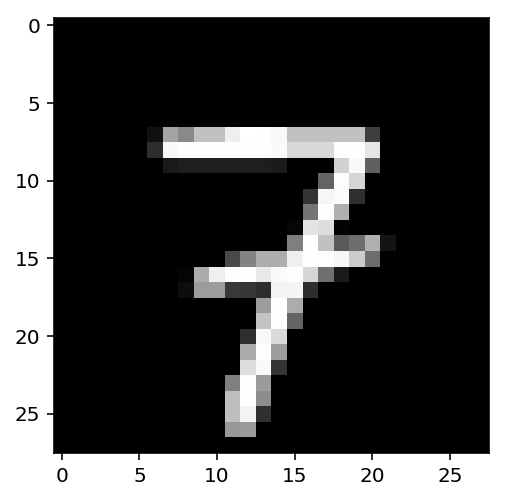

In [4]:
# Show an image from the dataset
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

# Part 2 - Defining the Network

There are  a 